### Neural Network

In [2]:
import pandas as pd 

df_not_scaled = pd.read_csv('../data/not_scaled_data.csv')

In [11]:
from sklearn import metrics
import numpy as np

def calc_median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y_pred, y_test):
    r2 = metrics.r2_score(y_test, y_pred)
    smse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mean_ae = metrics.mean_absolute_error(y_test, y_pred)
    mean_ape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    median_ae = metrics.median_absolute_error(y_test, y_pred)
    median_ape = calc_median_absolute_percentage_error(y_test, y_pred)
    return [r2, smse, mean_ae, mean_ape, median_ae, median_ape]
    
def within_x_percent(y_pred, y_test, x):
    return np.sum(np.abs((y_pred - y_test)/y_test) < x) / len(y_test) * 100

def show_metrics(y_pred, y_test, target_scaler = None, logarithm = False):        
    metrics_df = pd.DataFrame(columns=['Target', 'R2', 'Root Mean Squared Error', 'Mean Absolute Error',
                                            'Mean Absolute Percentage Error', 'Median Absolute Error', 'Median Absolute Percentage Error'])
    
    metrics_df.loc[0] = ['Target as it is'] + calculate_metrics(y_pred, y_test)
    
    if target_scaler:
        y_pred = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        metrics_df.loc[1] = ['Scaled Target is inversed to real value'] + calculate_metrics(y_pred, y_test)

    
    if logarithm:
        y_pred = np.power(10, y_pred)
        y_test = np.power(10, y_test)
        metrics_df.loc[2] = ['Target -> 10 ^ Target'] + calculate_metrics(y_pred, y_test)
    
    dist_df = pd.DataFrame({"within 5%": [within_x_percent(y_pred, y_test, 0.05)],
                    "within 10%": [within_x_percent(y_pred, y_test, 0.10)],
                    "within 20%": [within_x_percent(y_pred, y_test, 0.20)],
                    "within 50%": [within_x_percent(y_pred, y_test, 0.50)],
                    "median absolute percentage error": [calc_median_absolute_percentage_error(y_test, y_pred)]}, index=['Percentage'])
        
    display(metrics_df)
    display(dist_df)

Epoch 1/50


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8325 - val_loss: 0.6514
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5261 - val_loss: 0.3376
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2777 - val_loss: 0.2302
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1927 - val_loss: 0.1766
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1530 - val_loss: 0.1865
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1528 - val_loss: 0.1494
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1223 - val_loss: 0.1342
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1205 - val_loss: 0.1223
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1186 - val_loss: 0.1177
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1025 - val_loss: 0.1243
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1064 - val_loss: 0.1161
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0944 - val_loss: 0.1275


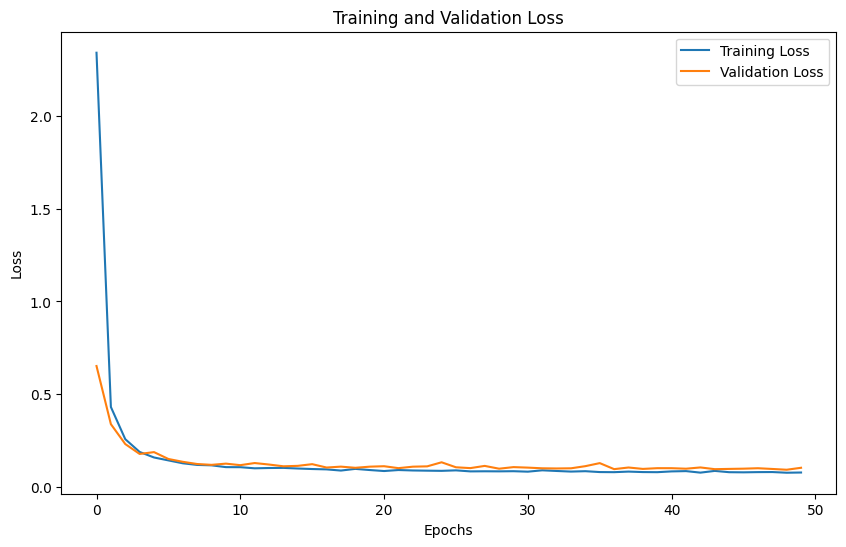

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

#features = df_not_scaled.drop(columns=['price', 'log_taxAssessedValue', 'log_price', 'taxAssessedValue'])
features = df_not_scaled[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target = df_not_scaled['log_price']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=True)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.710005,1.504942e-01,9.492835e-02,0.015674,0.075403,1.236402
2,Target -> 10 ^ Target,-1256.580837,4.479748e+07,1.828039e+06,0.529470,177840.125000,17.208072


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,16.050686,31.2566,57.127772,92.713833,17.208072


Epoch 1/200


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.3032 - val_loss: 2.5743
Epoch 2/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9860 - val_loss: 0.9769
Epoch 3/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7598 - val_loss: 0.4785
Epoch 4/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6977 - val_loss: 0.3399
Epoch 5/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6249 - val_loss: 0.2945
Epoch 6/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5973 - val_loss: 0.2646
Epoch 7/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5602 - val_loss: 0.3198
Epoch 8/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5310 - val_loss: 0.3684
Epoch 9/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5145 - val_loss: 0.3068
Epoch 10/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4889 - val_loss: 0.3829
Epoch 11/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4718 - val_loss: 0.2977
Epoch 12/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

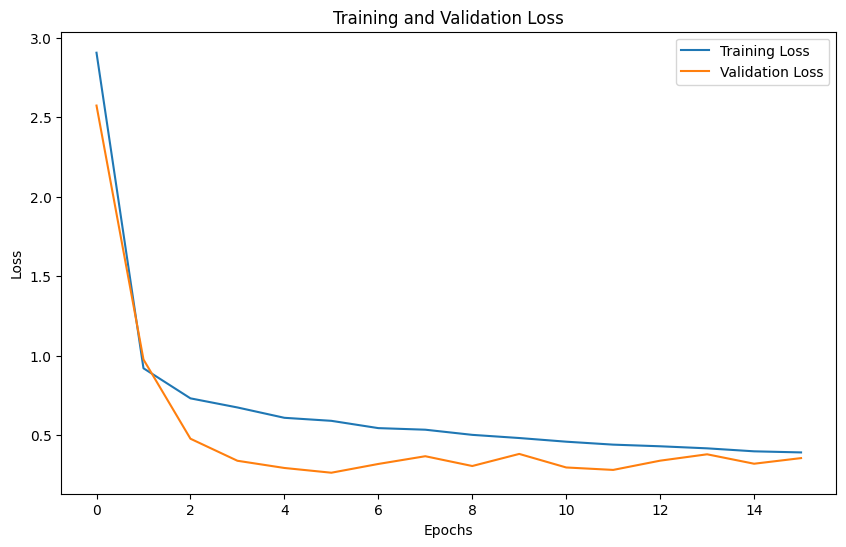

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_not_scaled is already defined
features = df_not_scaled.drop(columns=['price', 'log_taxAssessedValue', 'log_price', 'taxAssessedValue'])
target = df_not_scaled['log_price']

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.1, random_state=42)

# Building the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluating the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predicting and calculating additional metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Test RMSE: {rmse}')

# Plotting the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=True)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.552187,1.870135e-01,9.963244e-02,0.016229,0.067447,1.135863
2,Target -> 10 ^ Target,-658424.832490,1.025036e+09,3.373114e+07,6.896209,156122.875000,15.675863


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,18.901795,35.902851,59.345301,93.664203,15.675863


In [9]:
from tensorflow.keras.optimizers import Adam
# Drop the target variable and create features and target datasets
X = df_not_scaled.drop(columns=['price', 'log_price'])  # Adjust as needed
y = df_not_scaled['price']  # Or use 'log_price' if needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

Epoch 1/100


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1407506.8750 - val_loss: 1400191.1250
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1442482.8750 - val_loss: 1399675.3750
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1447534.3750 - val_loss: 1396692.6250
Epoch 4/100
41/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1326014.0000 

KeyboardInterrupt: 

Epoch 1/150


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 99.9999 - val_loss: 99.9982
Epoch 2/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.9910 - val_loss: 99.9101
Epoch 3/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.7704 - val_loss: 98.7958
Epoch 4/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97.9629 - val_loss: 93.7235
Epoch 5/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90.8358 - val_loss: 81.8295
Epoch 6/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78.7444 - val_loss: 75.8383
Epoch 7/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.9036 - val_loss: 73.9279
Epoch 8/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.8566 - val_loss: 71.7608
Epoch 9/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.2431 - val_loss: 69.3655
Epoch 10/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66.7448 - val_loss: 66.6642
Epoch 11/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64.5753 - val_loss: 63.7485
Epoch 12/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

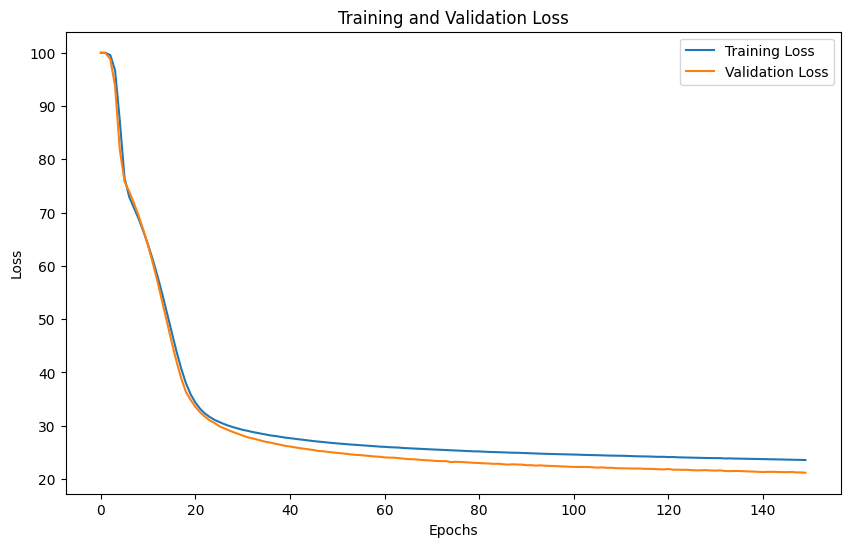

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_not_scaled.drop(columns=['price', 'log_price'])
# features = df_not_scaled[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_not_scaled['price']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.645719,751898.918686,356821.002541,0.202249,158443.375,16.23406


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,18.901795,33.474129,59.556494,94.086589,16.23406


In [49]:
df_filtered = df_not_scaled[df_not_scaled['price'] < 2000000]

Epoch 1/150


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 974548.4375 - val_loss: 1009117.2500
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 983950.5000 - val_loss: 1008067.1250
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 972059.7500 - val_loss: 995876.6875
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 950681.3125 - val_loss: 927669.3750
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 851150.1875 - val_loss: 705388.6250
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 598273.5625 - val_loss: 429224.1562
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 390123.0625 - val_loss: 342518.2188
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 316152.2500 - val_loss: 308313.9375
Epoch 9/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 295133.0000 - val_loss: 282368.5312
Epoch 10/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 264887.0000 - val_loss: 263093.2812
Epoch 11/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

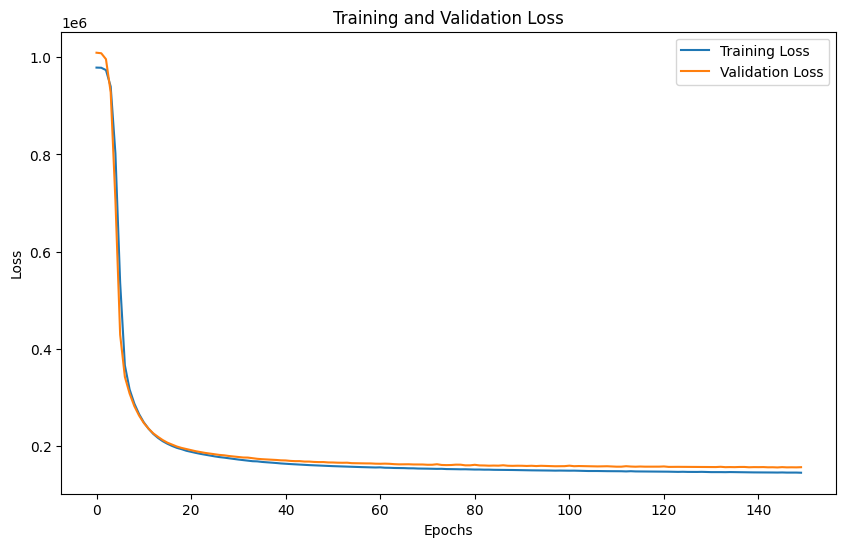

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_filtered.drop(columns=['price', 'log_price', 'lotAreaValue'])
# features = df_filtered[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_filtered['price']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adamw', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.719772,211864.981378,151744.034296,0.172237,110197.625,12.265364


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,23.670886,42.911392,71.392405,95.822785,12.265364
